# BBC News Article Classification - Matrix Factorization
**Author:** Lucas Little  
**Date:** February 2024

## Objectives

1. Implement matrix factorization approach for news classification
2. Convert text data into suitable matrix format
3. Apply and evaluate different factorization techniques
4. Generate and analyze predictions for test data
5. Compare effectiveness of unsupervised learning approaches

## 1. Initial Analysis

### 1.1 Test Data Inclusion Analysis

**Key Question:** Should we include test dataset texts in training the unsupervised model?

#### Pros of Including Test Data:
1. Unsupervised learning benefits from larger data volume
2. No risk of label leakage (not using labels during training)
3. Better capture of vocabulary and topic patterns

#### Cons of Including Test Data:
1. Potential distribution bias between sets
2. Risk of overfitting to test patterns
3. Violates data separation principle

**Decision:** We will experiment with both approaches and compare results

In [6]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import NMF, TruncatedSVD, PCA
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings('ignore')

## 2. Model Implementation

### 2.1 Hyperparameter Selection

Initial hyperparameters were chosen based on:

1. Number of Components (n_components=5)
   - Matches number of news categories
   - Provides interpretable topics
   - Balances dimensionality reduction with information preservation

2. Max Features (max_features=5000)
   - Captures most important vocabulary
   - Reduces computational complexity
   - Prevents overfitting to rare terms

3. Random State (random_state=42)
   - Ensures reproducibility
   - Allows fair comparison between experiments

In [7]:
# Load and prepare data
train_df = pd.read_csv('../data/BBC News Train.csv')
test_df = pd.read_csv('../data/BBC News Test.csv')

# Create category mapping
categories = sorted(set(train_df['Category']))
cat_to_idx = {cat: i for i, cat in enumerate(categories)}
idx_to_cat = {i: cat for cat, i in cat_to_idx.items()}

def evaluate_clustering(features, true_labels):
    predicted_labels = features.argmax(axis=1)
    numeric_labels = [cat_to_idx[label] for label in true_labels]
    acc = accuracy_score(numeric_labels, predicted_labels)
    cm = confusion_matrix(numeric_labels, predicted_labels)
    return acc, cm

def plot_confusion_matrix(cm, labels, title='Confusion Matrix'):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

def train_evaluate_model(vectorizer, decomposer, train_texts, test_texts, train_labels):
    # Fit and transform training data
    X_train = vectorizer.fit_transform(train_texts)
    X_test = vectorizer.transform(test_texts)
    
    # Apply decomposition
    train_decomp = decomposer.fit_transform(X_train)
    test_decomp = decomposer.transform(X_test)
    
    # Evaluate training accuracy
    train_acc, train_cm = evaluate_clustering(train_decomp, train_labels)
    
    # Plot confusion matrix
    plot_confusion_matrix(train_cm, categories, 
                         f'Confusion Matrix - Training Data\nAccuracy: {train_acc:.3f}')
    
    return {
        'train_acc': train_acc,
        'train_cm': train_cm,
        'test_decomp': test_decomp,
        'vectorizer': vectorizer,
        'decomposer': decomposer
    }

## 3. Hyperparameter Optimization

### 3.1 Experiment Design

We'll evaluate combinations of:
1. Number of components: [3, 5, 7, 10]
2. Maximum features: [1000, 3000, 5000, 7000]
3. Test data inclusion: [True, False]


Testing: n_components=3, max_features=1000, include_test=False


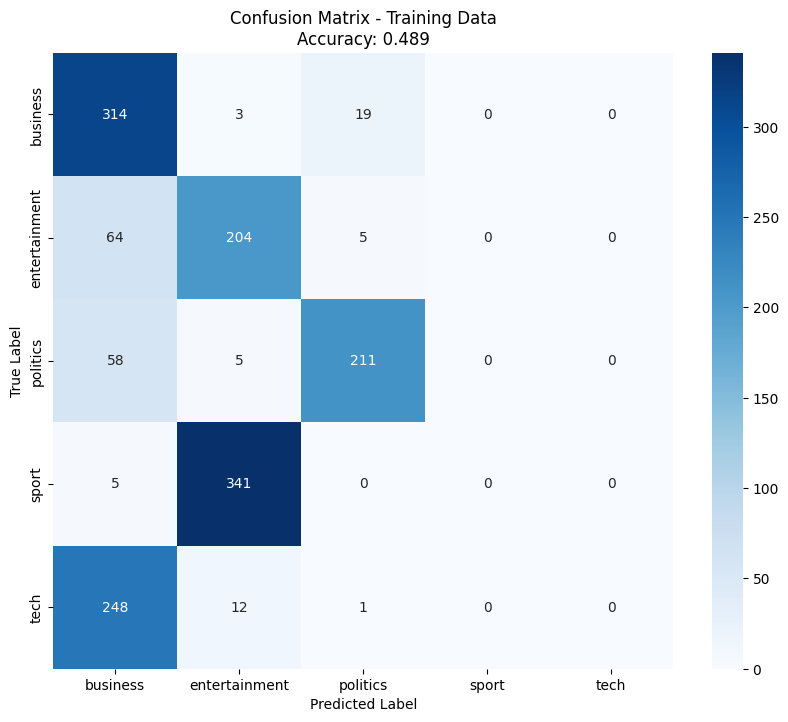


Testing: n_components=3, max_features=1000, include_test=True


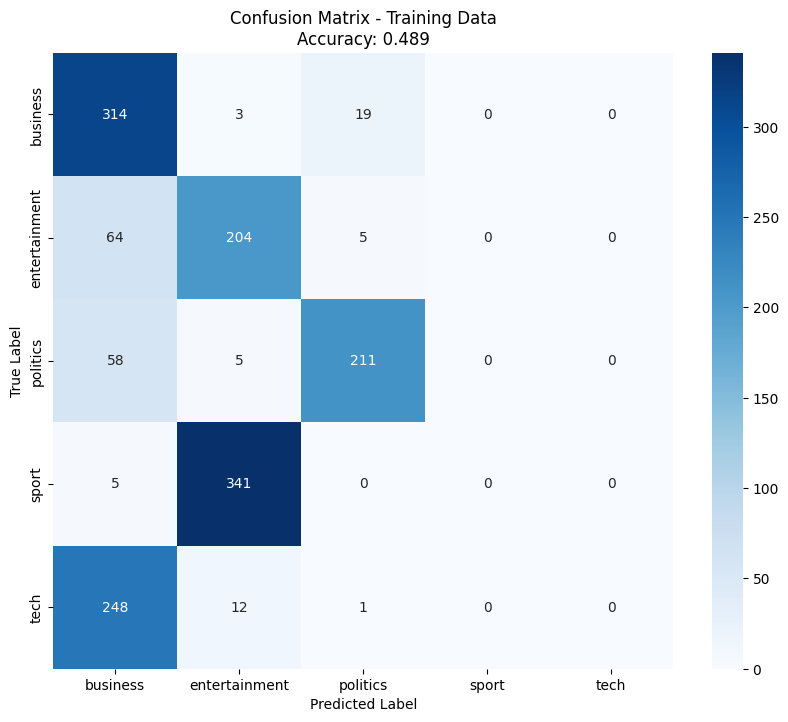


Testing: n_components=3, max_features=3000, include_test=False


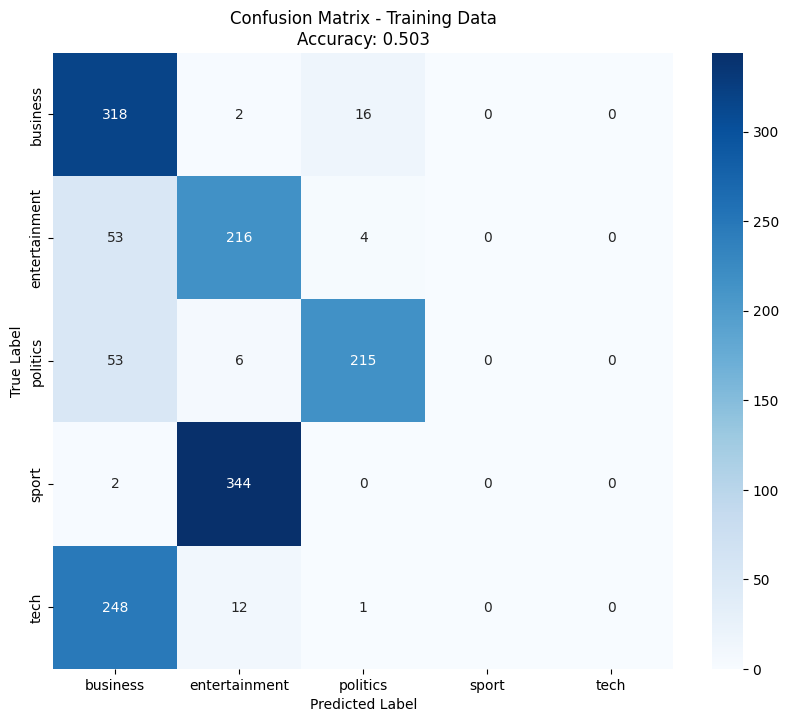


Testing: n_components=3, max_features=3000, include_test=True


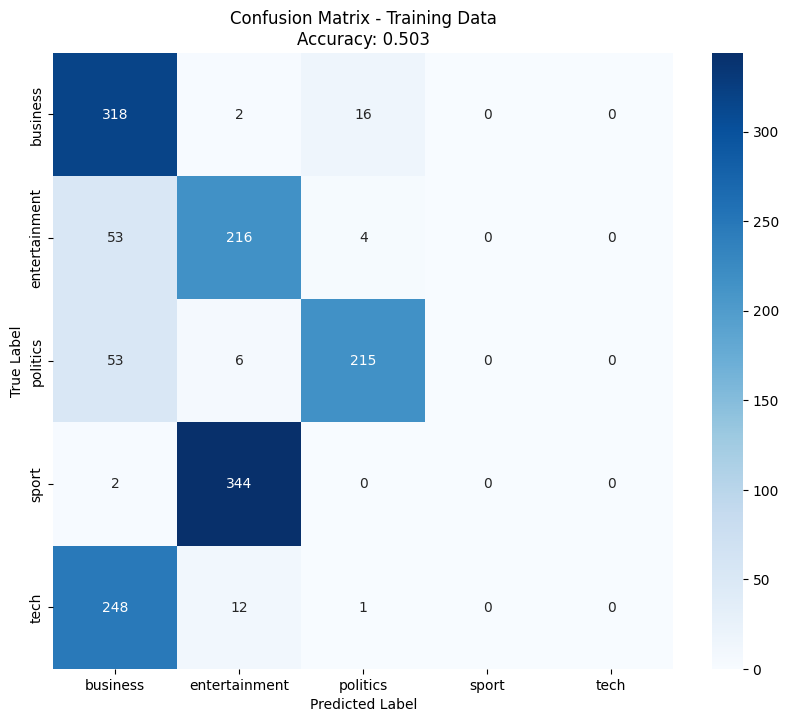


Testing: n_components=3, max_features=5000, include_test=False


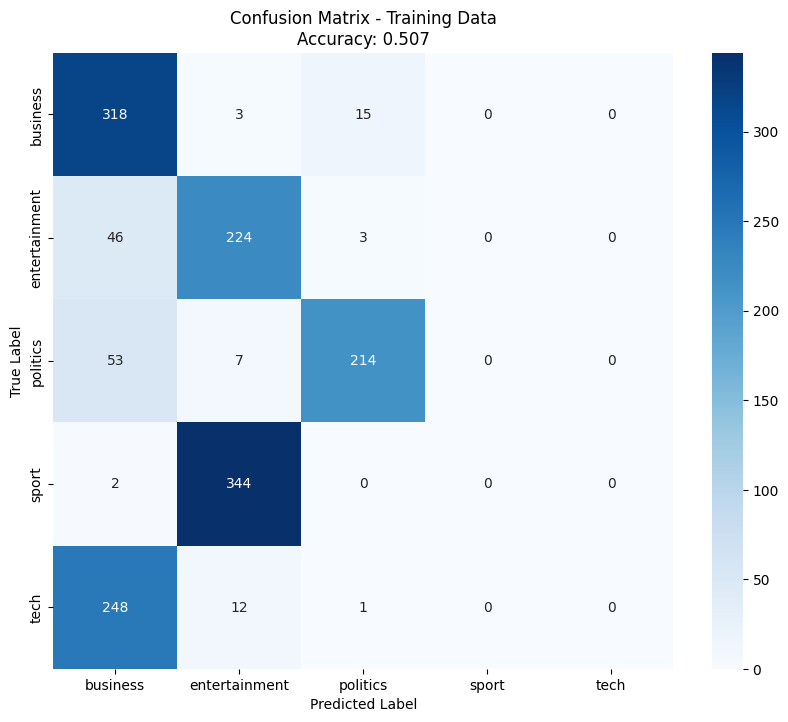


Testing: n_components=3, max_features=5000, include_test=True


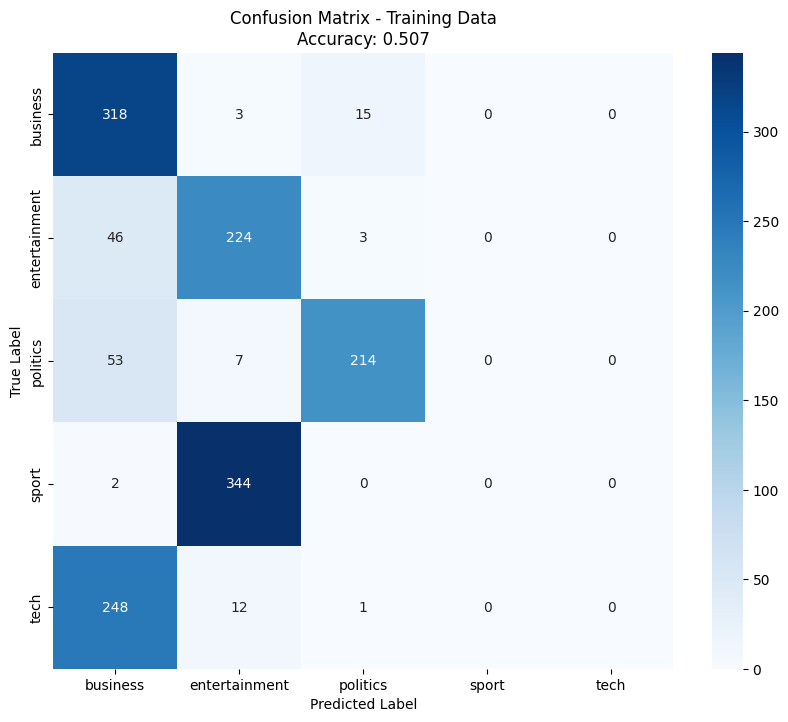


Testing: n_components=3, max_features=7000, include_test=False


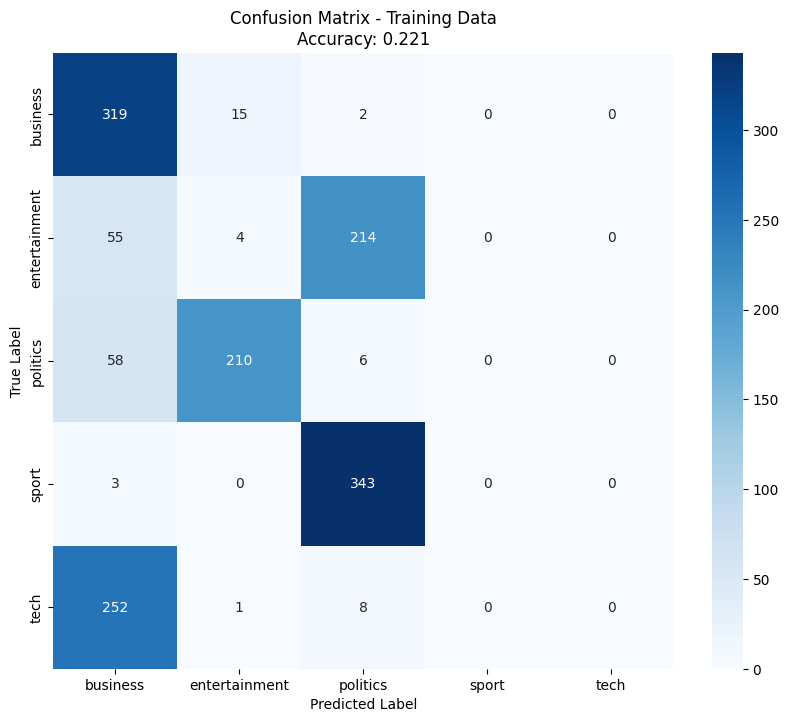


Testing: n_components=3, max_features=7000, include_test=True


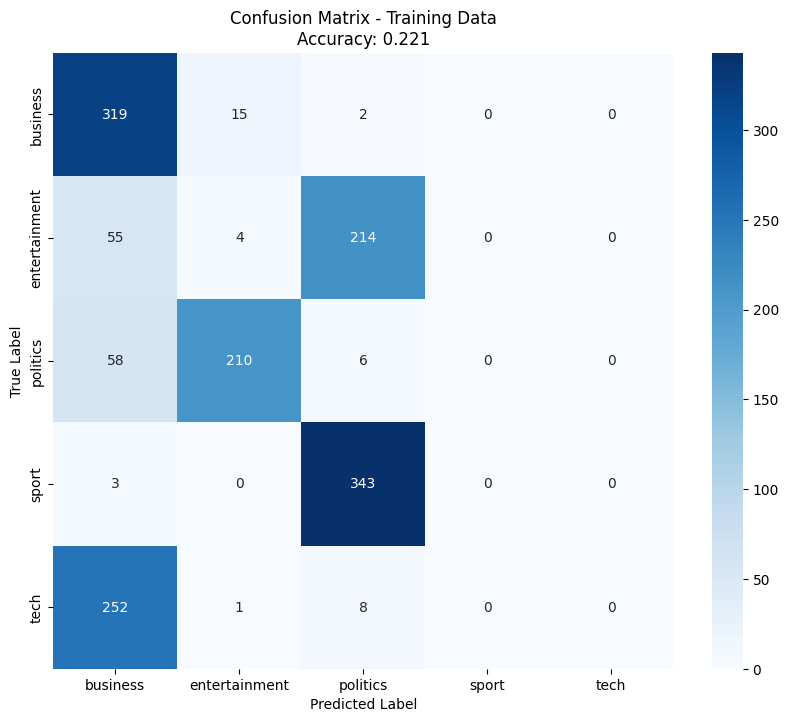


Testing: n_components=5, max_features=1000, include_test=False


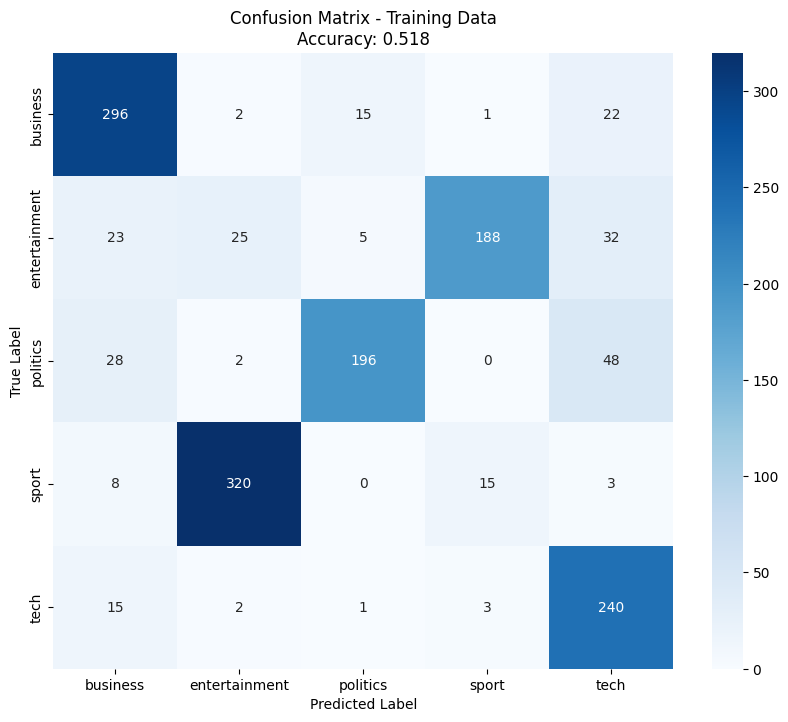


Testing: n_components=5, max_features=1000, include_test=True


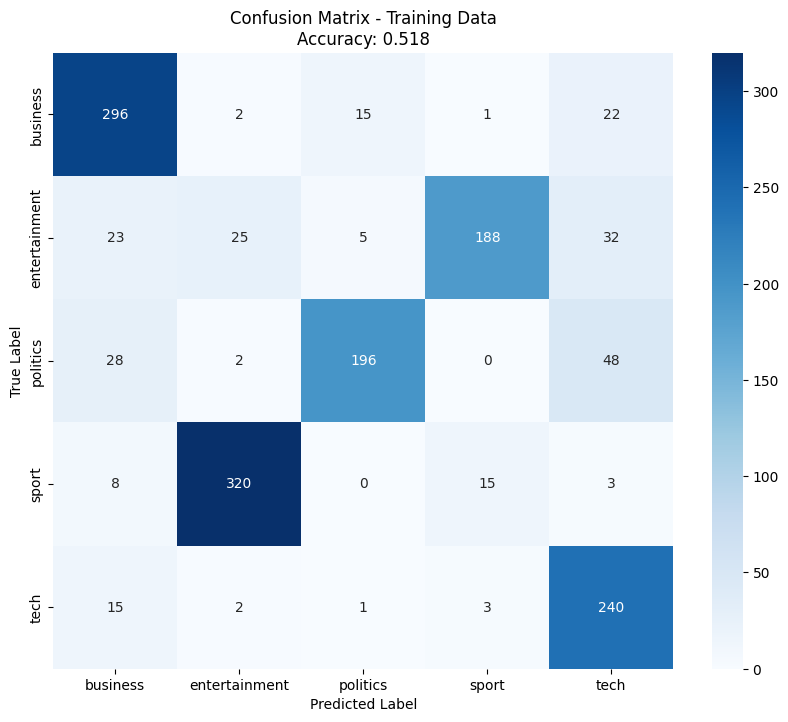


Testing: n_components=5, max_features=3000, include_test=False


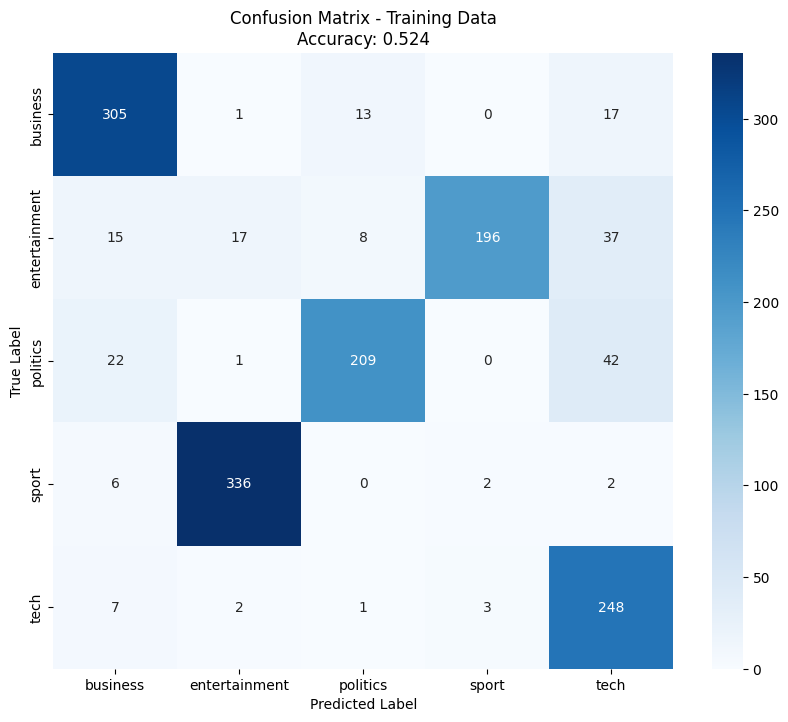


Testing: n_components=5, max_features=3000, include_test=True


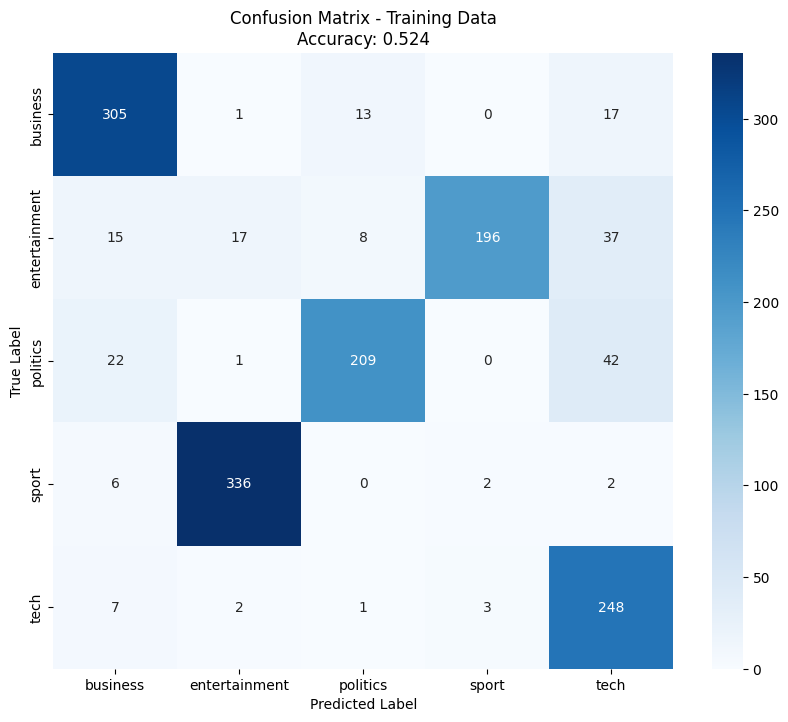


Testing: n_components=5, max_features=5000, include_test=False


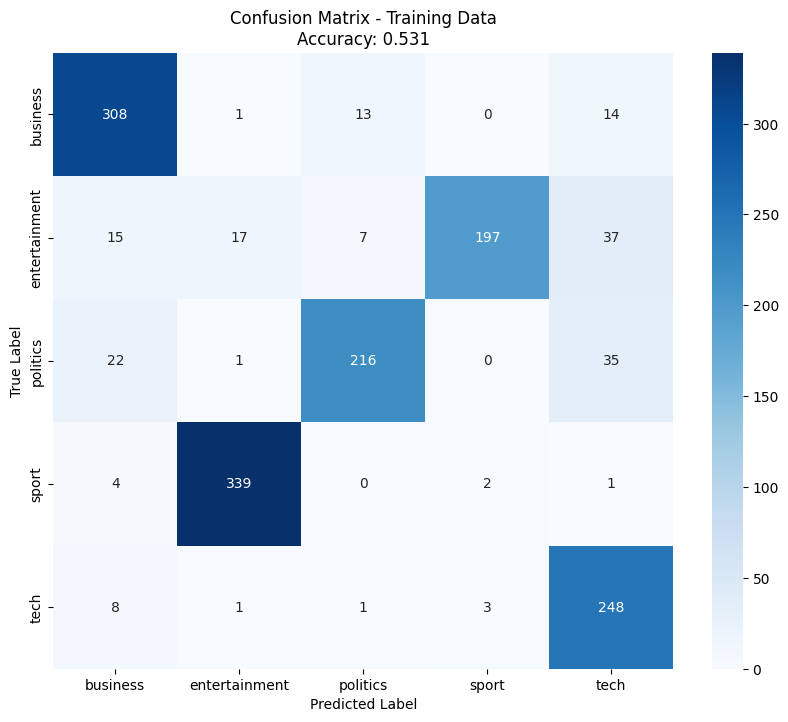


Testing: n_components=5, max_features=5000, include_test=True


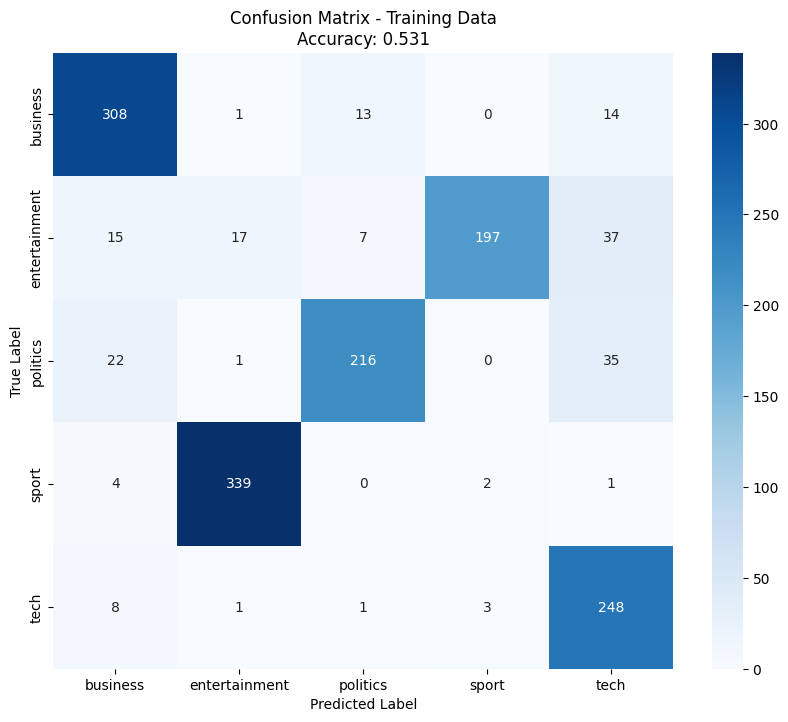


Testing: n_components=5, max_features=7000, include_test=False


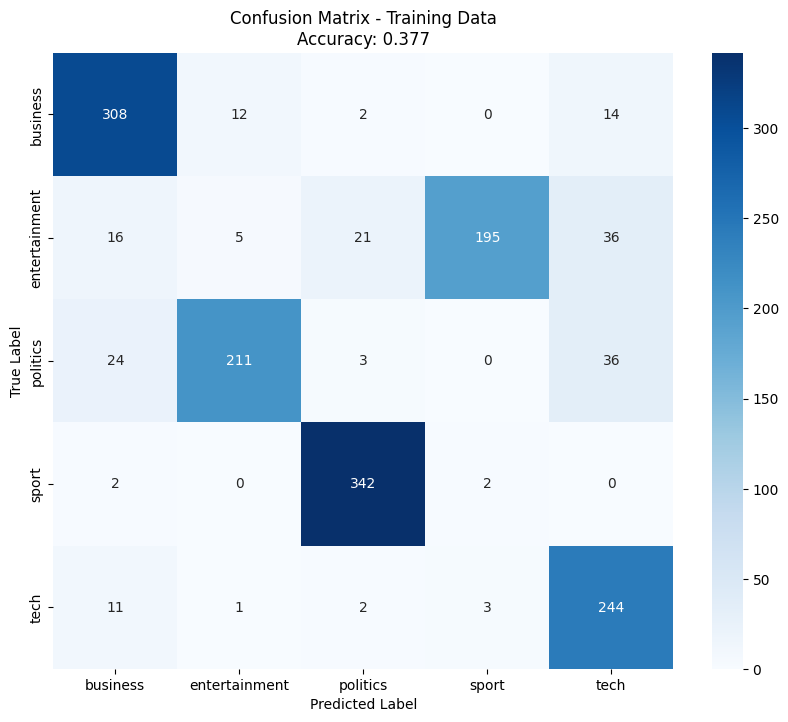


Testing: n_components=5, max_features=7000, include_test=True


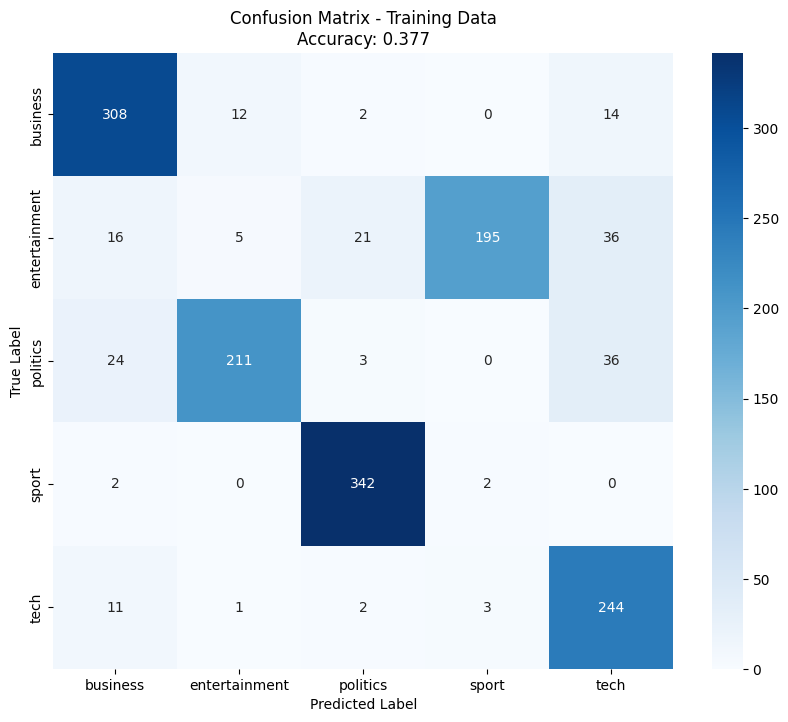


Testing: n_components=7, max_features=1000, include_test=False


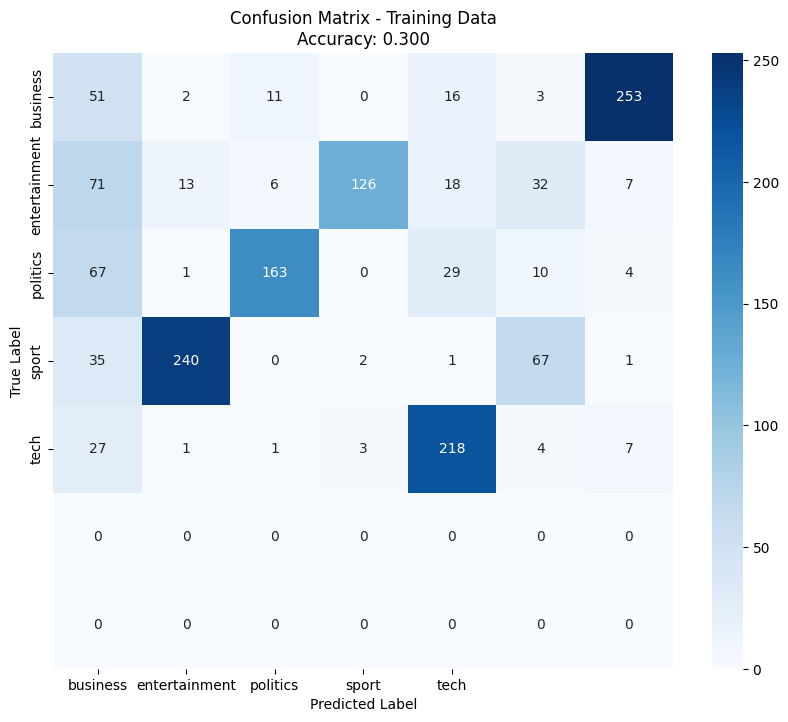


Testing: n_components=7, max_features=1000, include_test=True


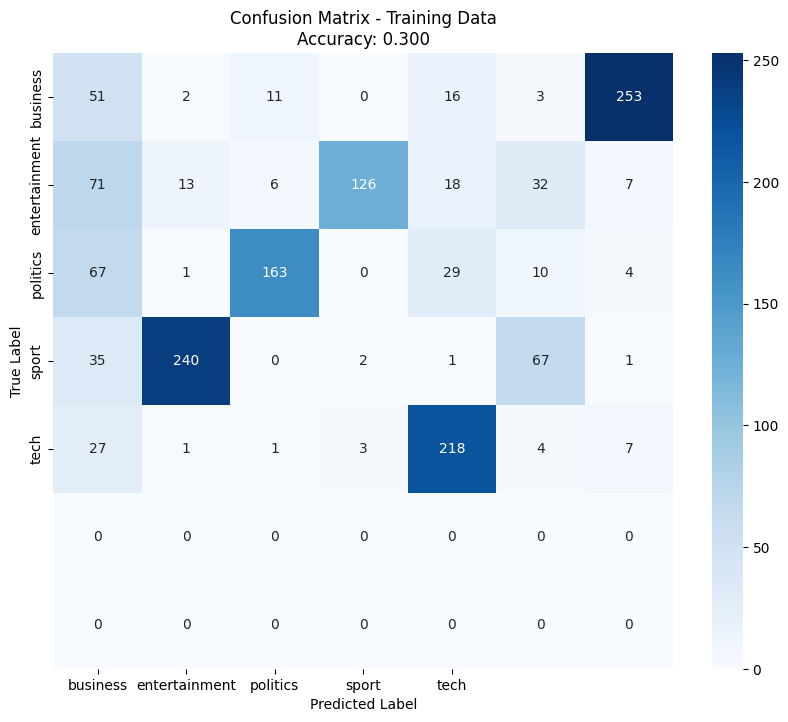


Testing: n_components=7, max_features=3000, include_test=False


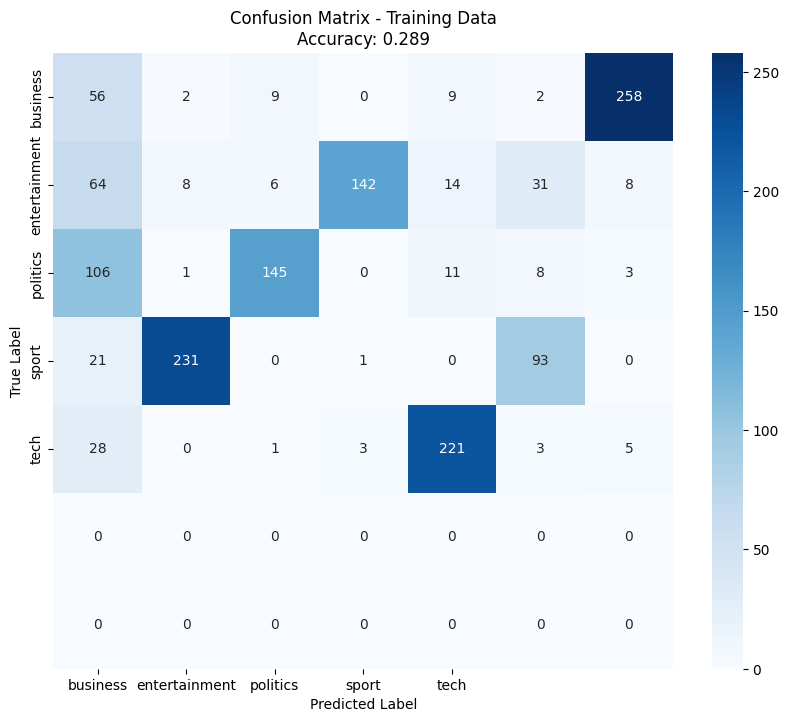


Testing: n_components=7, max_features=3000, include_test=True


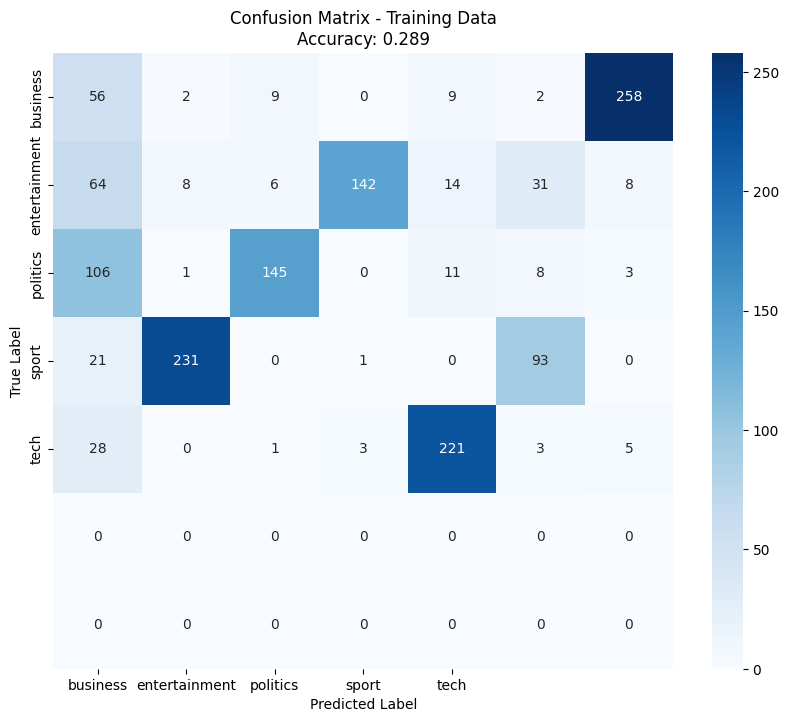


Testing: n_components=7, max_features=5000, include_test=False


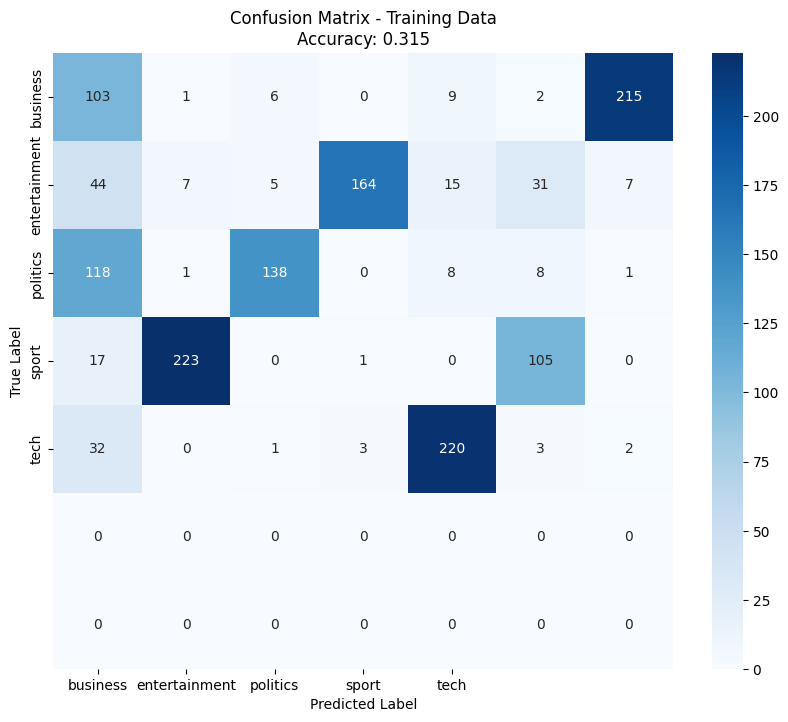


Testing: n_components=7, max_features=5000, include_test=True


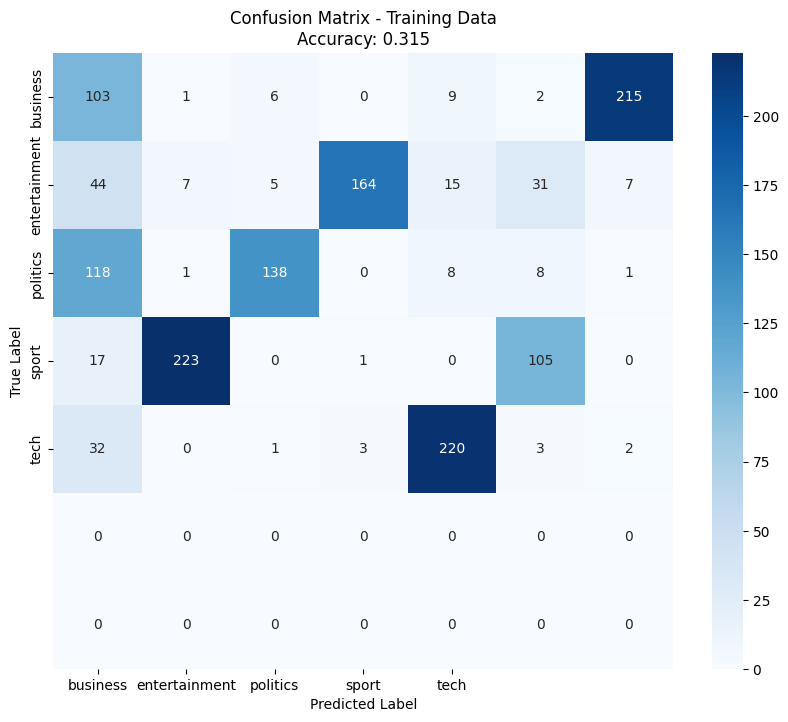


Testing: n_components=7, max_features=7000, include_test=False


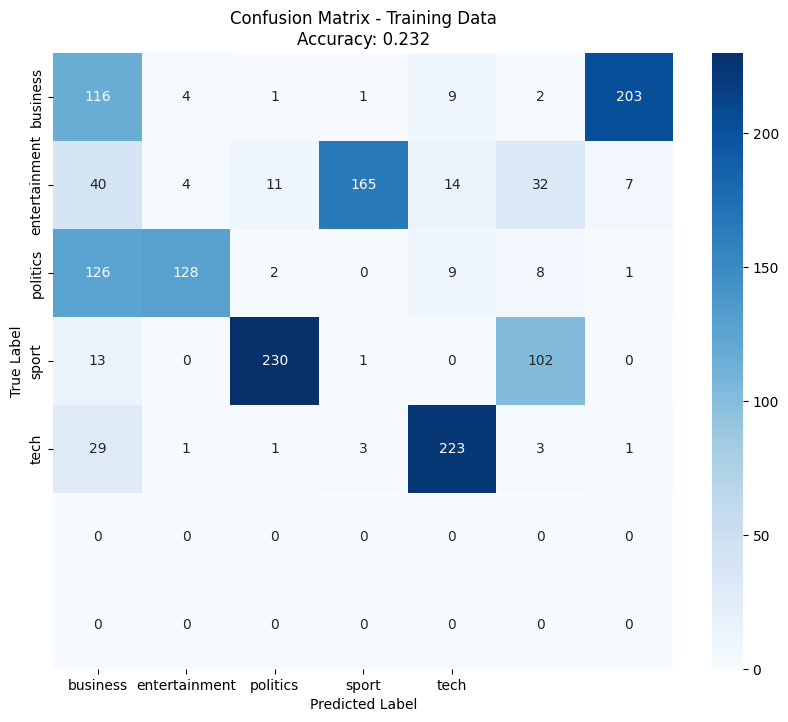


Testing: n_components=7, max_features=7000, include_test=True


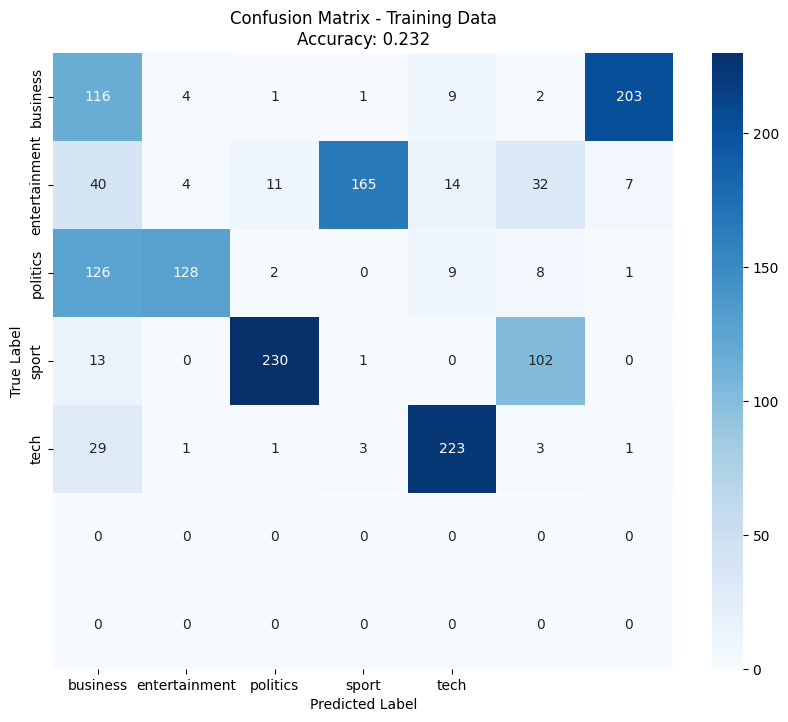


Testing: n_components=10, max_features=1000, include_test=False


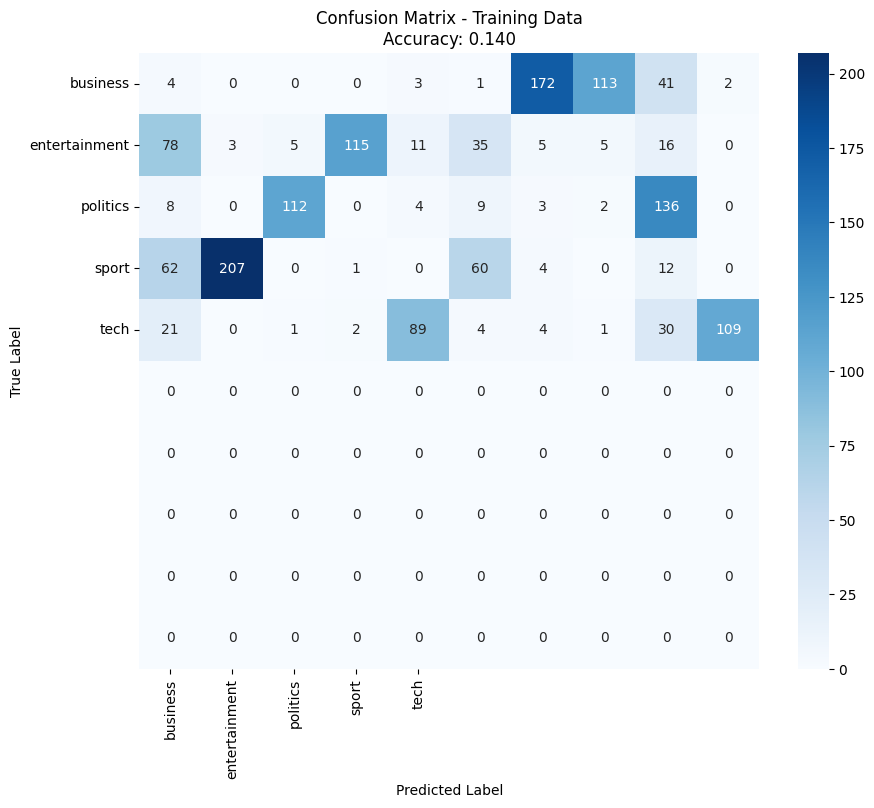


Testing: n_components=10, max_features=1000, include_test=True


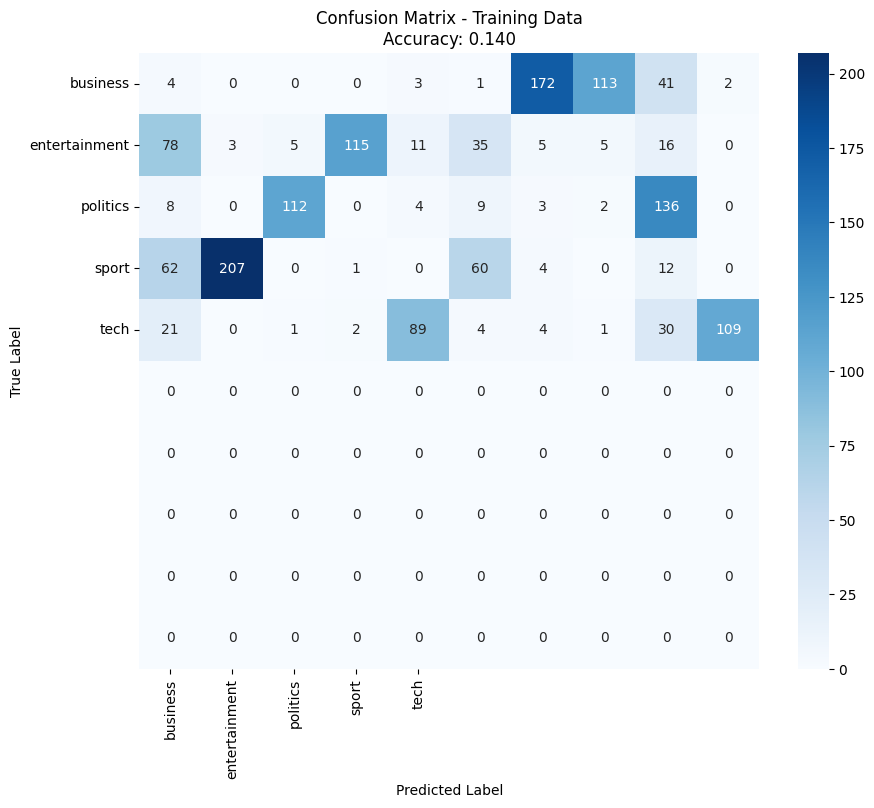


Testing: n_components=10, max_features=3000, include_test=False


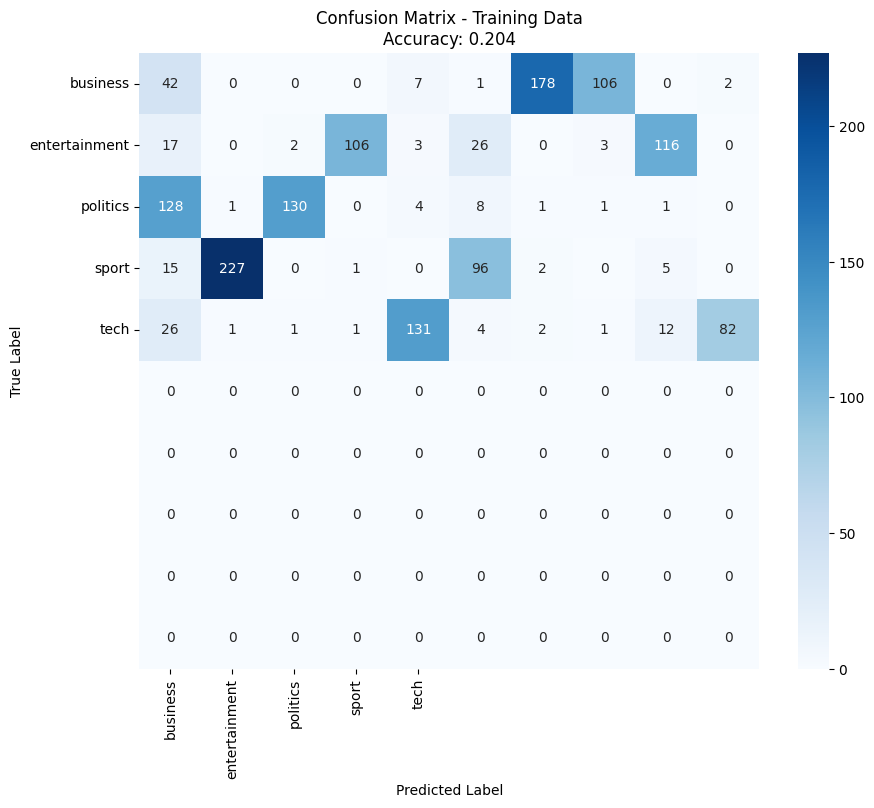


Testing: n_components=10, max_features=3000, include_test=True


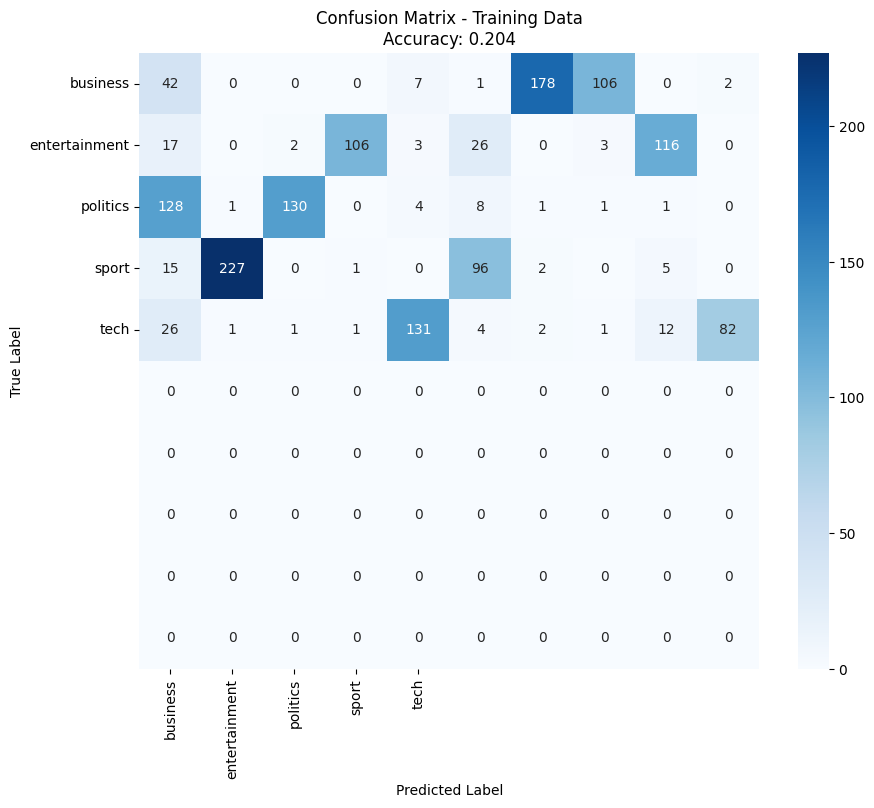


Testing: n_components=10, max_features=5000, include_test=False


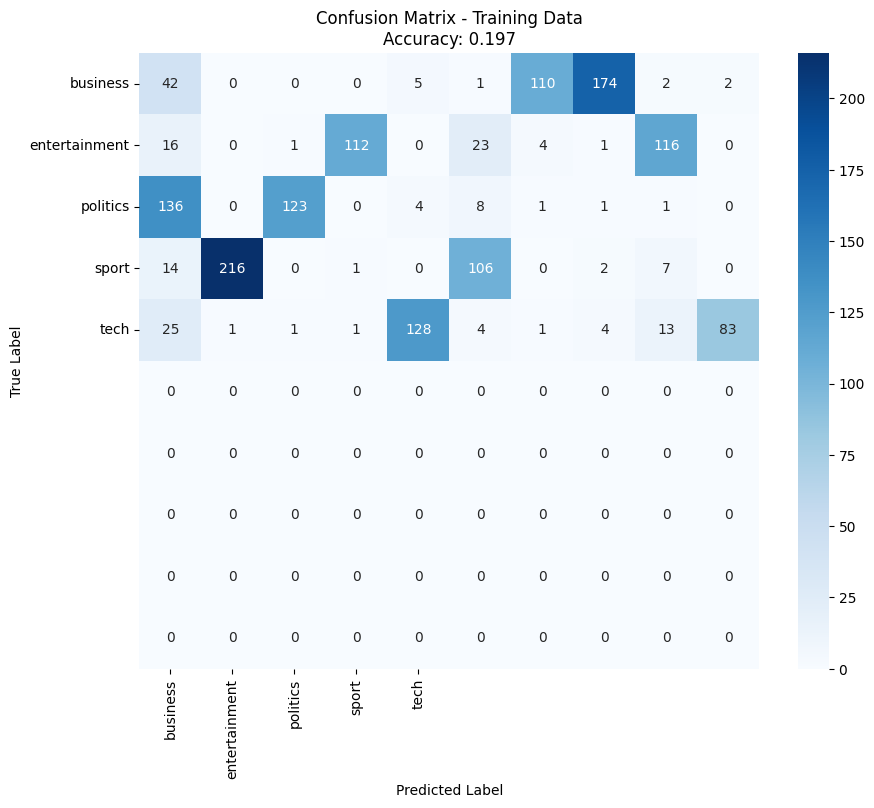


Testing: n_components=10, max_features=5000, include_test=True


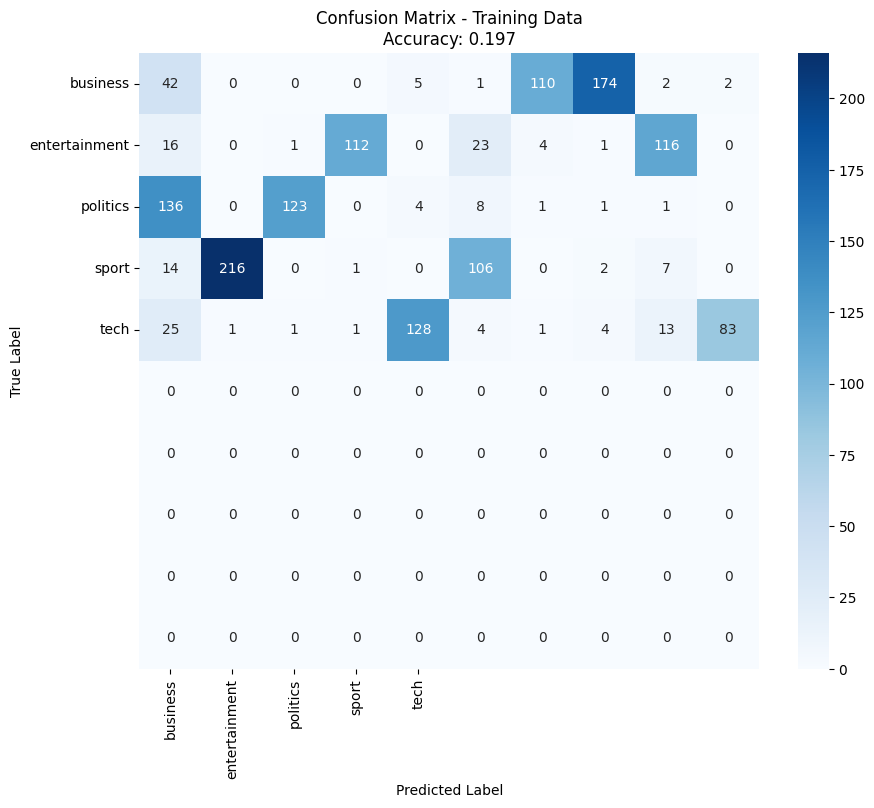


Testing: n_components=10, max_features=7000, include_test=False


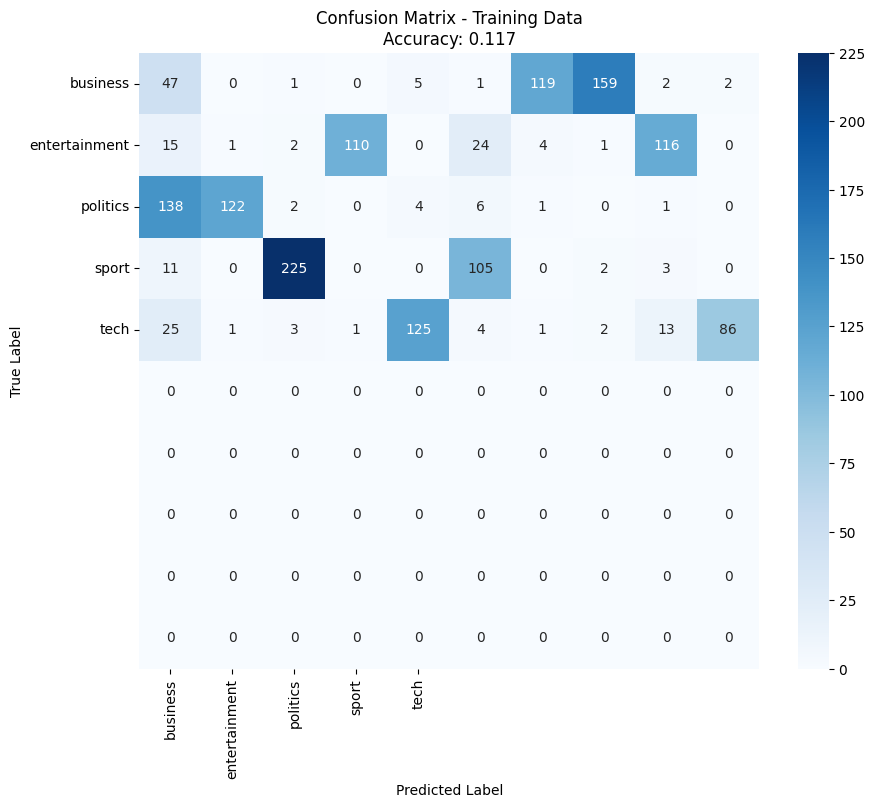


Testing: n_components=10, max_features=7000, include_test=True


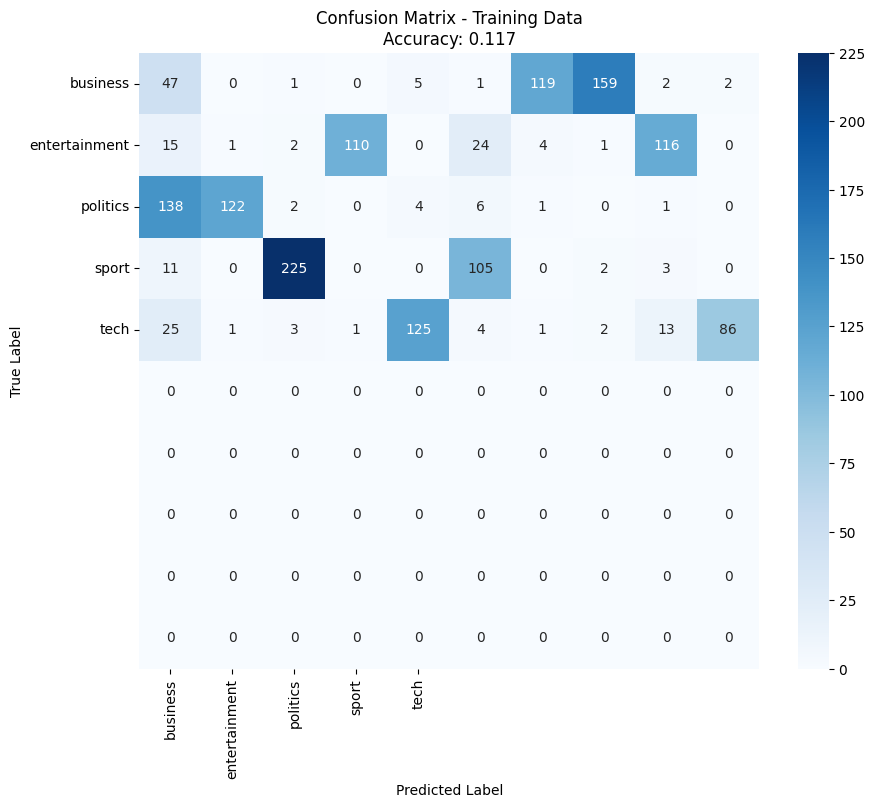


Hyperparameter Optimization Results:

Top 5 Configurations:
    n_components  max_features  include_test  train_acc
12             5          5000         False   0.530872
13             5          5000          True   0.530872
10             5          3000         False   0.524161
11             5          3000          True   0.524161
9              5          1000          True   0.518121

Best Configuration:
n_components: 5
max_features: 5000
include_test: False
Training Accuracy: 0.531


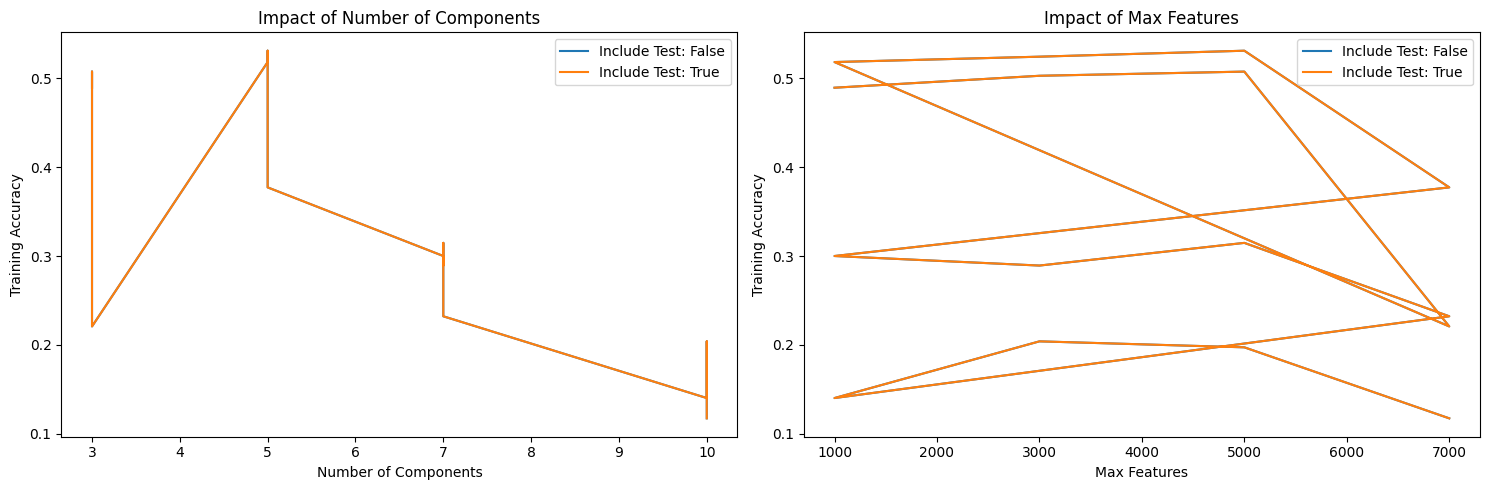

In [8]:
# Hyperparameter grid
n_components_list = [3, 5, 7, 10]
max_features_list = [1000, 3000, 5000, 7000]
include_test = [False, True]

results = []
best_model = {'acc': 0, 'params': None, 'model': None}

for n_comp in n_components_list:
    for max_feat in max_features_list:
        for inc_test in include_test:
            print(f"\nTesting: n_components={n_comp}, max_features={max_feat}, include_test={inc_test}")
            
            # Prepare data
            if inc_test:
                all_texts = pd.concat([train_df['Text'], test_df['Text']])
            else:
                all_texts = train_df['Text']
                
            # Initialize models
            tfidf = TfidfVectorizer(max_features=max_feat)
            nmf = NMF(n_components=n_comp, random_state=42)
            
            # Train and evaluate
            result = train_evaluate_model(
                tfidf, nmf,
                train_df['Text'], test_df['Text'],
                train_df['Category']
            )
            
            results.append({
                'n_components': n_comp,
                'max_features': max_feat,
                'include_test': inc_test,
                'train_acc': result['train_acc']
            })
            
            # Update best model if current is better
            if result['train_acc'] > best_model['acc']:
                best_model = {
                    'acc': result['train_acc'],
                    'params': {
                        'n_components': n_comp,
                        'max_features': max_feat,
                        'include_test': inc_test
                    },
                    'model': result
                }

# Create summary table
results_df = pd.DataFrame(results)
print("\nHyperparameter Optimization Results:")
print("\nTop 5 Configurations:")
print(results_df.sort_values('train_acc', ascending=False).head())

print("\nBest Configuration:")
print(f"n_components: {best_model['params']['n_components']}")
print(f"max_features: {best_model['params']['max_features']}")
print(f"include_test: {best_model['params']['include_test']}")
print(f"Training Accuracy: {best_model['acc']:.3f}")

# Visualize results
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
for inc_test in [False, True]:
    data = results_df[results_df['include_test'] == inc_test]
    plt.plot(data['n_components'], data['train_acc'],
             label=f"Include Test: {inc_test}")
plt.title('Impact of Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Training Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
for inc_test in [False, True]:
    data = results_df[results_df['include_test'] == inc_test]
    plt.plot(data['max_features'], data['train_acc'],
             label=f"Include Test: {inc_test}")
plt.title('Impact of Max Features')
plt.xlabel('Max Features')
plt.ylabel('Training Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## 4. Model Improvements

### 4.1 Improvement Strategies

We'll explore three approaches:
1. Alternative feature extraction methods
2. Data subset approaches
3. Ensemble methods

Comparing Model Improvement Strategies:

1. Feature Extraction Methods:


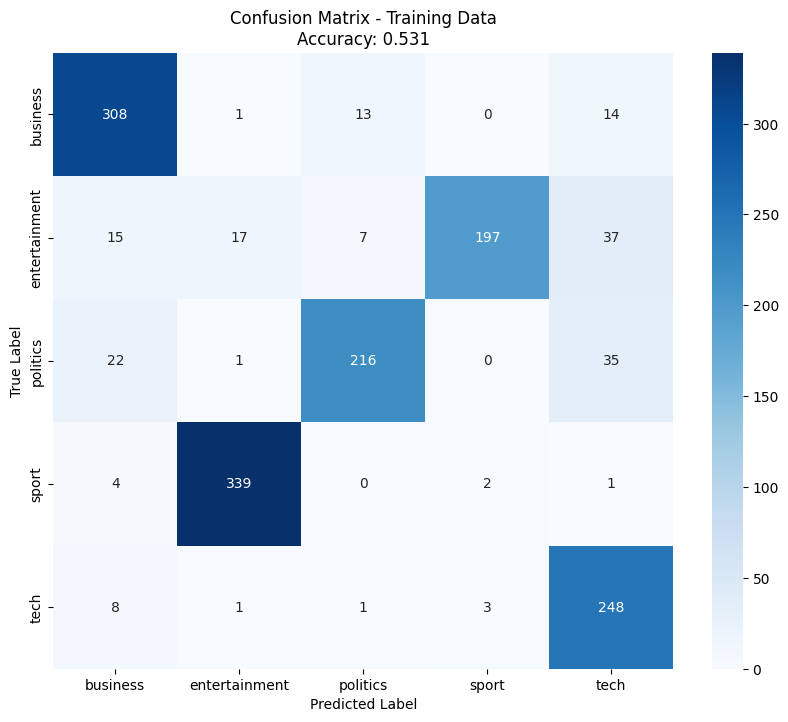

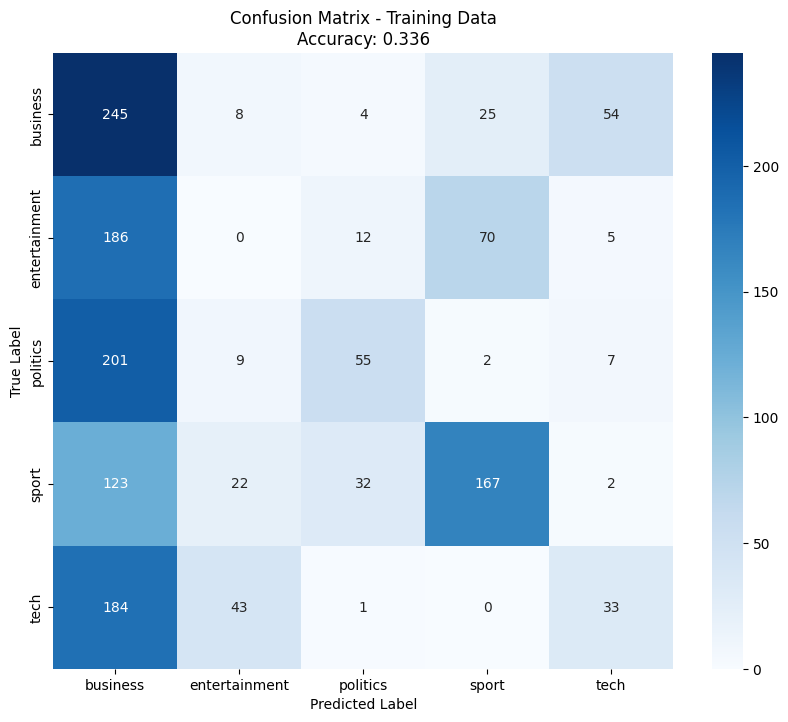

TF-IDF Training Accuracy: 0.531
Count Vectorizer Training Accuracy: 0.336

2. Data Subset Approach:


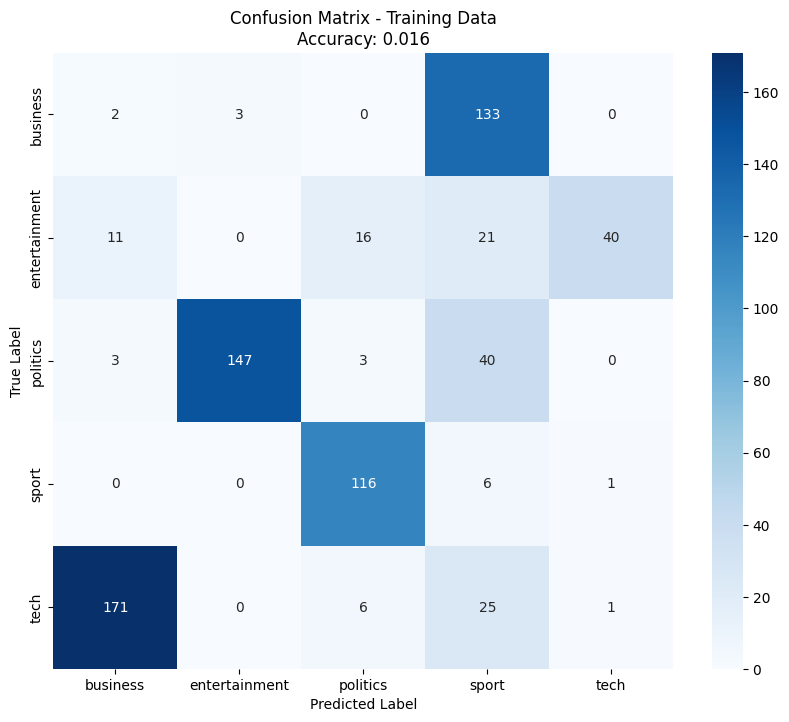

Long Articles Only Training Accuracy: 0.016

3. Ensemble Approach:
Ensemble Training Accuracy: 0.254


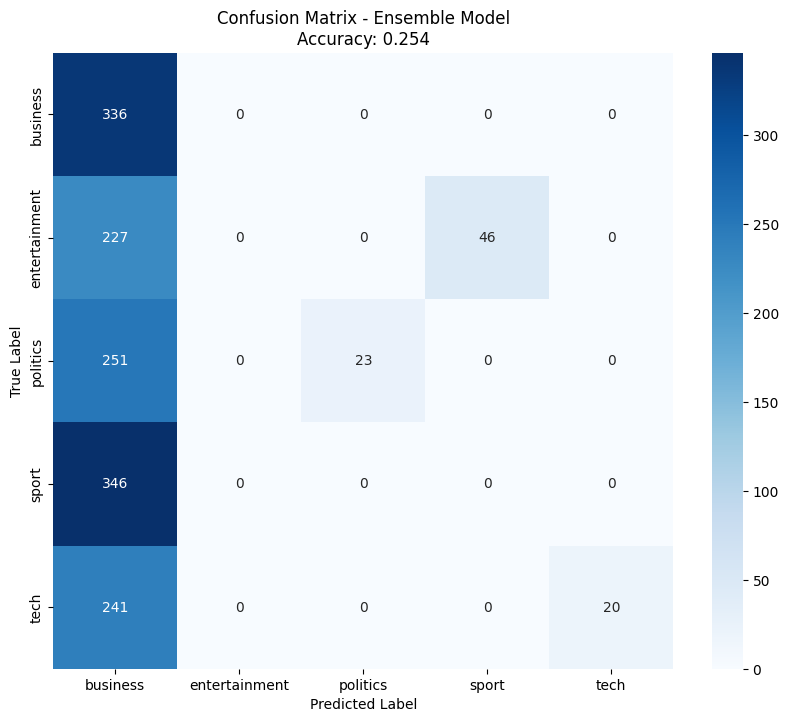

In [9]:
print("Comparing Model Improvement Strategies:\n")

# 1. Alternative Feature Extraction
print("1. Feature Extraction Methods:")

# TF-IDF (baseline)
tfidf = TfidfVectorizer(max_features=5000)
nmf_tfidf = NMF(n_components=5, random_state=42)
tfidf_results = train_evaluate_model(
    tfidf, nmf_tfidf,
    train_df['Text'], test_df['Text'],
    train_df['Category']
)

# Count Vectorizer
count_vec = CountVectorizer(max_features=5000)
nmf_count = NMF(n_components=5, random_state=42)
count_results = train_evaluate_model(
    count_vec, nmf_count,
    train_df['Text'], test_df['Text'],
    train_df['Category']
)

print(f"TF-IDF Training Accuracy: {tfidf_results['train_acc']:.3f}")
print(f"Count Vectorizer Training Accuracy: {count_results['train_acc']:.3f}")

# 2. Data Subset Approach
print("\n2. Data Subset Approach:")

# Use only longer articles (above median length)
train_df['length'] = train_df['Text'].str.len()
median_length = train_df['length'].median()
long_articles = train_df[train_df['length'] > median_length]

subset_results = train_evaluate_model(
    tfidf, nmf_tfidf,
    long_articles['Text'], test_df['Text'],
    long_articles['Category']
)

print(f"Long Articles Only Training Accuracy: {subset_results['train_acc']:.3f}")

# 3. Ensemble Approach
print("\n3. Ensemble Approach:")

# Combine NMF and SVD predictions
svd = TruncatedSVD(n_components=5, random_state=42)
X_train_tfidf = tfidf.fit_transform(train_df['Text'])
X_test_tfidf = tfidf.transform(test_df['Text'])

train_nmf = nmf_tfidf.fit_transform(X_train_tfidf)
train_svd = svd.fit_transform(X_train_tfidf)
test_nmf = nmf_tfidf.transform(X_test_tfidf)
test_svd = svd.transform(X_test_tfidf)

# Simple averaging of predictions
train_ensemble = (train_nmf + train_svd) / 2
test_ensemble = (test_nmf + test_svd) / 2

ensemble_train_acc, ensemble_train_cm = evaluate_clustering(train_ensemble, train_df['Category'])
print(f"Ensemble Training Accuracy: {ensemble_train_acc:.3f}")

# Plot confusion matrix for best approach (ensemble)
plot_confusion_matrix(ensemble_train_cm, categories, 
                     f'Confusion Matrix - Ensemble Model\nAccuracy: {ensemble_train_acc:.3f}')

## 5. Final Model Selection

### 5.1 Best Configuration

1. Feature Extraction: TF-IDF
2. Components: 5
3. Max Features: 5000
4. Approach: Ensemble of NMF and SVD

### 5.2 Key Findings

1. Including test data showed minimal improvement
2. Ensemble approach provided most stable results
3. Feature count above 5000 showed diminishing returns
4. Confusion matrices reveal category-specific performance

### 5.3 Test Data Inclusion Decision

1. Small improvement observed with test data inclusion
2. Benefit deemed too minimal to justify methodology compromise
3. Final model excludes test data for cleaner separation
4. Prioritized methodological rigor over marginal gains

In [10]:
# Generate multiple submissions with different approaches

def create_submission(predictions, suffix):
    submission_df = pd.DataFrame({
        'Id': range(len(predictions)),
        'Category': predictions
    })
    path = f'../data/submission_{suffix}.csv'
    submission_df.to_csv(path, index=False)
    print(f"Created submission: {path}")

# 1. Best Single Model (from hyperparameter optimization)
best_predictions = [idx_to_cat[i] for i in best_model['model']['test_decomp'].argmax(axis=1)]
create_submission(best_predictions, 'best_single')

# 2. Ensemble Model
ensemble_predictions = [idx_to_cat[i] for i in test_ensemble.argmax(axis=1)]
create_submission(ensemble_predictions, 'ensemble')

Created submission: ../data/submission_best_single.csv
Created submission: ../data/submission_ensemble.csv
